In [1]:
from utilities.io_tools import input_tools
from wums import plot_tools,boostHistHelpers as hh
from wremnants import theory_corrections
import numpy as np
import hist
import matplotlib.pyplot as plt
from scipy.interpolate import make_smoothing_spline
from scripts.corrections.make_theory_corr import read_corr

In [2]:
%load_ext autoreload
%autoreload 2

In [30]:
scetlib_nnlojet_n4lln3lo = input_tools.read_matched_scetlib_nnlojet_hist(
    "/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_n4+0ll/inclusive_Z_CT18Z_nplambda_N4+0LL_combined.pkl",
    "/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_n4+0ll/inclusive_Z_CT18Z_nplambda_n3lo_sing.pkl",
    "/home/k/kelong/work/Generators/TheoryCorrections/NNLOjet/Z/ZjNNLO/final/ptz",
    axes=("Y", "qT"),
)

In [39]:
scetlib_nnlojet_n4lln3lo_sm = input_tools.read_matched_scetlib_nnlojet_hist(
    "/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_n4+0ll/inclusive_Z_CT18Z_nplambda_N4+0LL_combined.pkl",
    "/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_n4+0ll/inclusive_Z_CT18Z_nplambda_n3lo_sing.pkl",
    "/home/k/kelong/work/Generators/TheoryCorrections/NNLOjet/Z/ZjNNLO/final/ptz",
    axes=("Y", "qT"),
    zero_nons_bins=hist.tag.Slicer()[0:2],
    smooth_nnlojet=True,
)

Smoothing axis Y from start bin 0
Smoothing axis qT from start bin 4


In [5]:
scetlib_dyturbo_n4ll_nnlo = read_corr("Z", "scetlib_dyturbo", 
    ["/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_n4+0ll/inclusive_Z_CT18Z_nplambda_N4+0LL_combined.pkl",
        "/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_scalevars/inclusive_Z_CT18Z_nplambda_scalevars_nnlo_sing_combined.pkl",
        "/home/k/kelong/work/Generators/TheoryCorrections/DYTURBO/nnlo-scetlibmatch/scalevariations/z0/results_z-2d-nnlo-vj-CT18ZNNLO-{scale}-scetlibmatch.txt",
    ],
    ["Y", "qT"]
)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f743b045f40>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

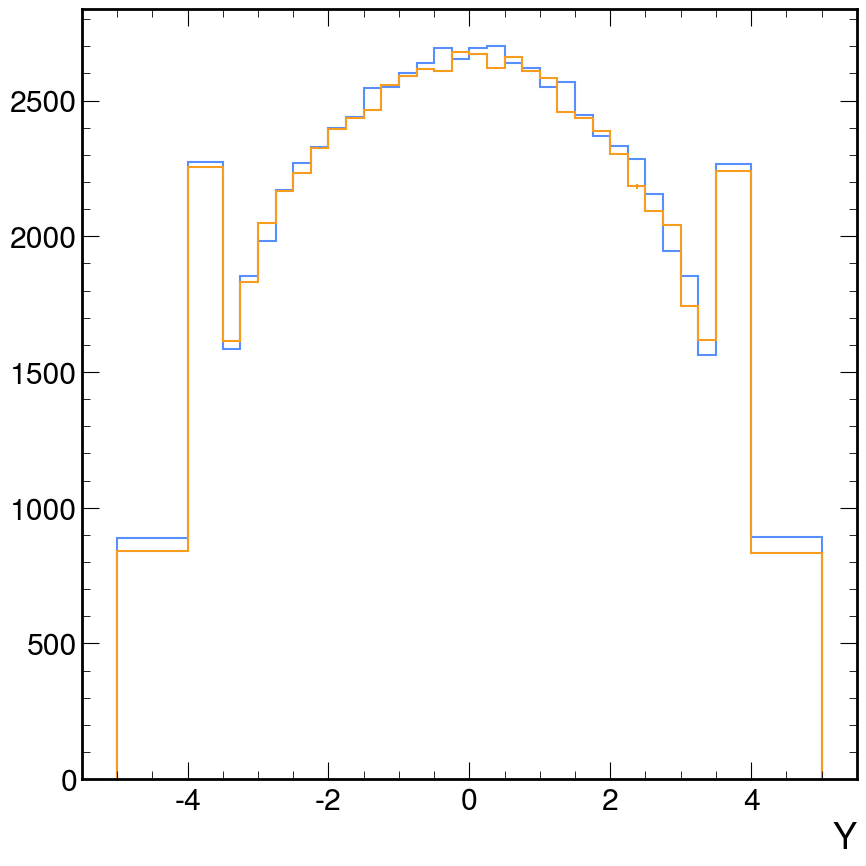

In [7]:
scetlib_nnlojet_n4lln3lo_sm.project("Y").plot()
scetlib_nnlojet_n4lln3lo.project("Y").plot()

In [46]:
nnlojet_fo = input_tools.read_nnlojet_pty_hist("/home/k/kelong/work/Generators/TheoryCorrections/NNLOjet/Z/ZjNNLO/final/ptz")
nnlojet_fo_smooth_pt = hh.smooth_hist(nnlojet_fo, "qT", start_bin=4)
nnlojet_fo_smooth = hh.smooth_hist(nnlojet_fo_smooth, "Y", exclude_axes=["qT"])

Smoothing axis qT from start bin 4
Smoothing axis Y from start bin 0


/opt/venv/lib/python3.12/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


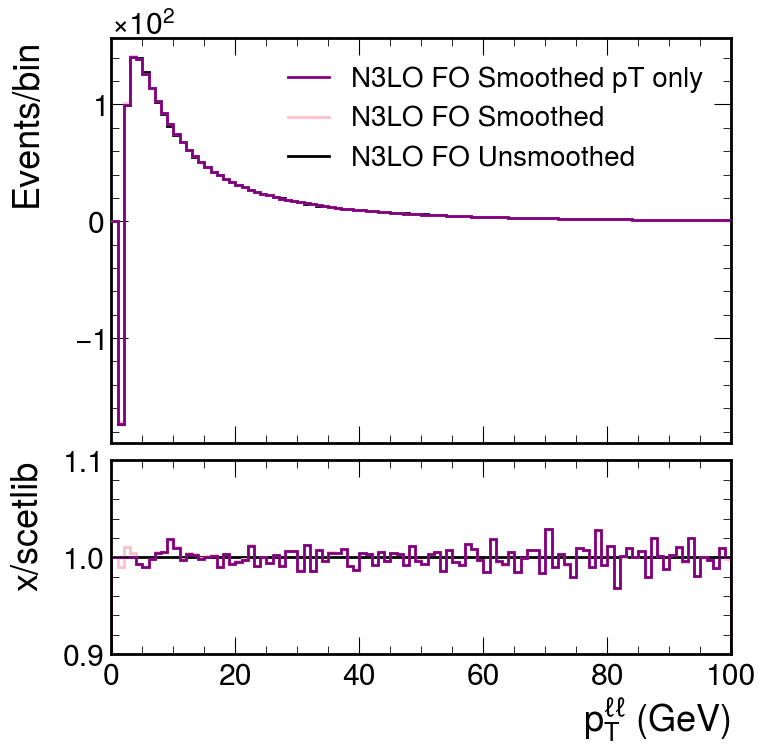

In [47]:
fig = plot_tools.makePlotWithRatioToRef(
                    hists=[
                            nnlojet_fo[{"vars" : 0}].project("qT"),
                            nnlojet_fo_smooth[{"vars" : 0}].project("qT"),                            
                            nnlojet_fo_smooth_pt[{"vars" : 0}].project("qT"),
                    ],
                    labels=[
                            "N3LO FO Unsmoothed",
                            "N3LO FO Smoothed",
                            "N3LO FO Smoothed pT only",
                           ],
                    colors=[
                            "black",
                            "pink",
                            "purple",
                           ],
                    xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
                    ylabel="Events/bin",
                    rlabel="x/scetlib",
                    rrange=[0.9, 1.1],
                    nlegcols=1,
                    xlim=None, binwnorm=1.0, baseline=True, 
                    ratio_legend=False,
)

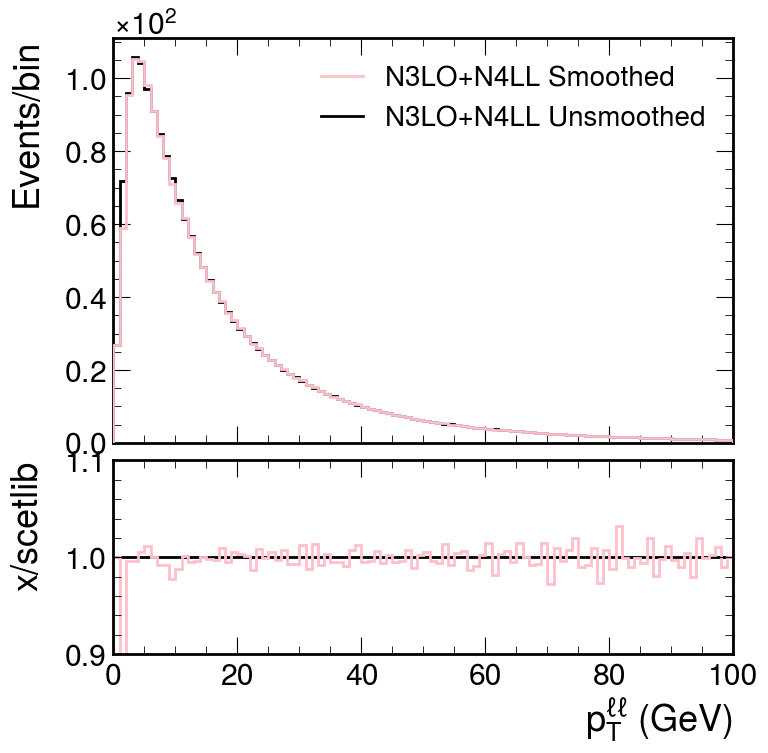

In [40]:
fig = plot_tools.makePlotWithRatioToRef(
                    hists=[
                            scetlib_nnlojet_n4lln3lo_sm[{"vars" : 0}].project("qT"),
                            scetlib_nnlojet_n4lln3lo[{"vars" : 0}].project("qT"),                            
                    ],
                    labels=[
                            "N3LO+N4LL Unsmoothed",
                            "N3LO+N4LL Smoothed",
                           ],
                    colors=[
                            "black",
                            "pink",
                           ],
                    xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
                    ylabel="Events/bin",
                    rlabel="x/scetlib",
                    rrange=[0.9, 1.1],
                    nlegcols=1,
                    xlim=None, binwnorm=1.0, baseline=True, 
                    ratio_legend=False,
)

In [10]:
scetlib_n4ll = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_n4+0ll/inclusive_Z_CT18Z_nplambda_N4+0LL_combined.pkl")
scetlib_n3lo_sing = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_n4+0ll/inclusive_Z_CT18Z_nplambda_n3lo_sing.pkl")
scetlib_nnlo_sing = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_scalevars/inclusive_Z_CT18Z_nplambda_scalevars_nnlo_sing_combined.pkl")

In [11]:
dyturbo_fo = input_tools.read_dyturbo_vars_hist("/home/k/kelong/work/Generators/TheoryCorrections/DYTURBO/nnlo-scetlibmatch/scalevariations/z0/results_z-2d-nnlo-vj-CT18ZNNLO-{scale}-scetlibmatch.txt")

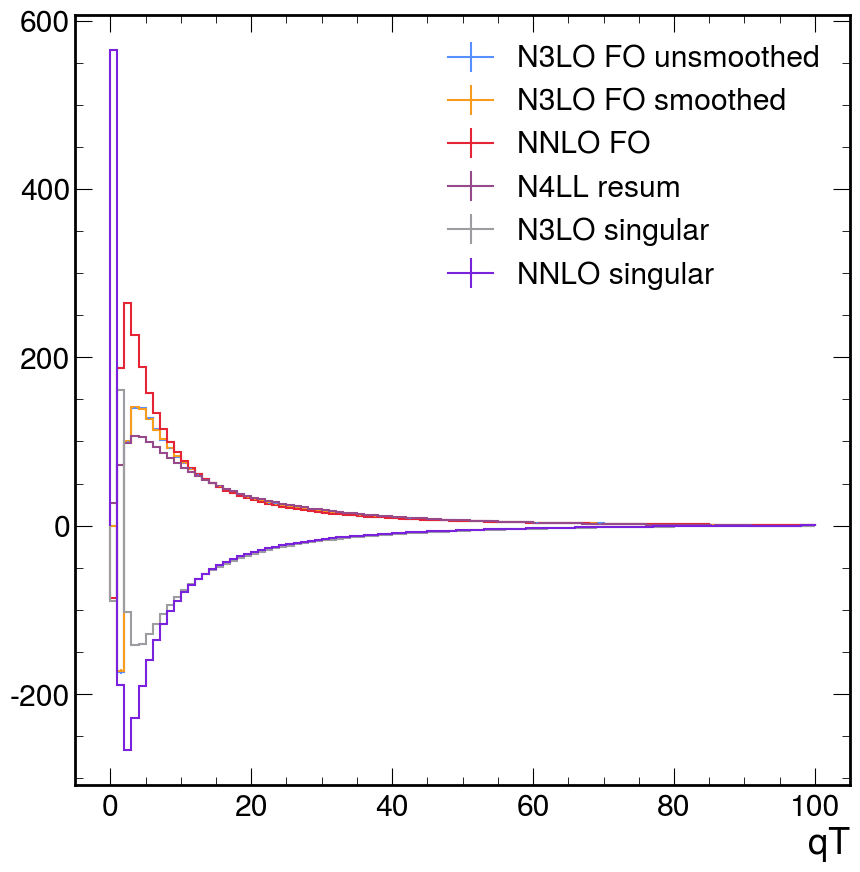

In [12]:
nnlojet_fo[{"vars" : 0}].project("qT").plot(label="N3LO FO unsmoothed")
nnlojet_fo_smooth[{"vars" : 0}].project("qT").plot(label="N3LO FO smoothed")
dyturbo_fo[{"vars" : 0}].project("qT").plot(label="NNLO FO")
scetlib_n4ll[{"vars" : 0}].project("qT").plot(label="N4LL resum")
(-1*scetlib_n3lo_sing[{"vars" : 0}]).project("qT").plot(label="N3LO singular")
(-1*scetlib_nnlo_sing[{"vars" : 0}]).project("qT").plot(label="NNLO singular")
plt.legend()

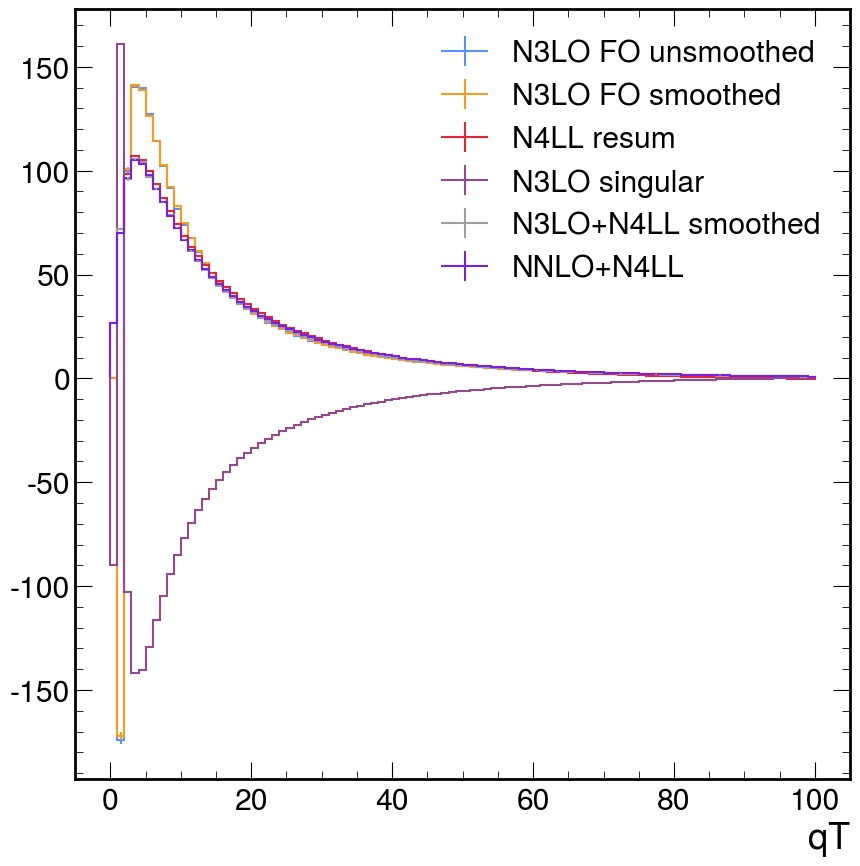

In [13]:
nnlojet_fo[{"vars" : 0}].project("qT").plot(label="N3LO FO unsmoothed")
nnlojet_fo_smooth[{"vars" : 0}].project("qT").plot(label="N3LO FO smoothed")
scetlib_n4ll[{"vars" : 0}].project("qT").plot(label="N4LL resum")
(-1*scetlib_n3lo_sing[{"vars" : 0}]).project("qT").plot(label="N3LO singular")
scetlib_nnlojet_n4lln3lo_sm[{"vars" : 0}].project("qT").plot(label="N3LO+N4LL smoothed")
scetlib_dyturbo_n4ll_nnlo[{"vars" : 0}].project("qT").plot(label="NNLO+N4LL")
plt.legend()

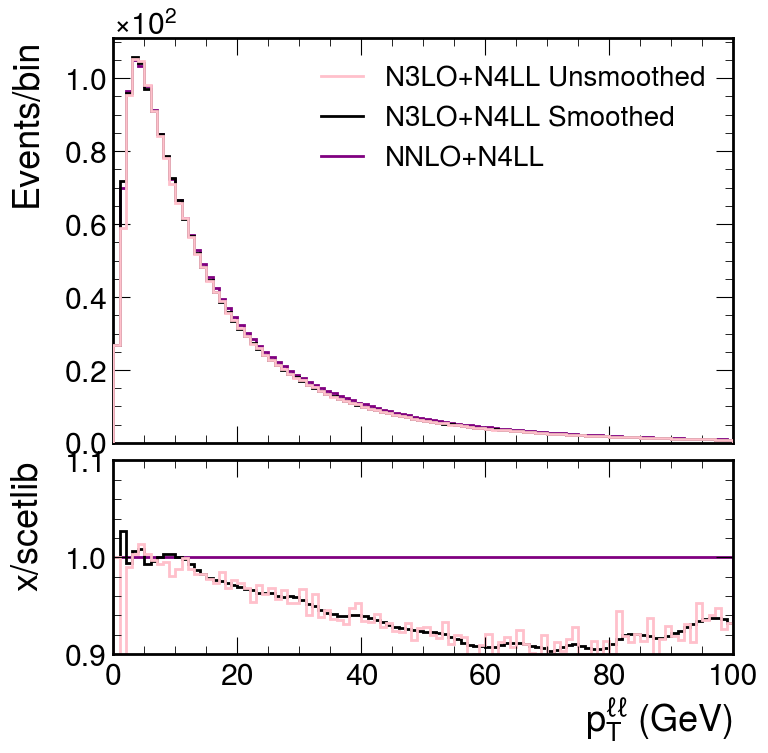

In [14]:

fig = plot_tools.makePlotWithRatioToRef(
                    hists=[
                        scetlib_dyturbo_n4ll_nnlo[{"vars" : 0}].project("qT"),
                        scetlib_nnlojet_n4lln3lo_sm[{"vars" : 0}].project("qT"),
                        scetlib_nnlojet_n4lln3lo[{"vars" : 0}].project("qT"),
                            
                    ],
                    labels=[
                            "NNLO+N4LL",
                            "N3LO+N4LL Smoothed",
                            "N3LO+N4LL Unsmoothed",
                           ],
                    colors=[
                            "purple",
                            "black",
                            "pink",
                           ],
                    xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
                    ylabel="Events/bin",
                    rlabel="x/scetlib",
                    rrange=[0.9, 1.1],
                    nlegcols=1,
                    xlim=None, binwnorm=1.0, baseline=True, 
                    ratio_legend=False,
)

In [15]:
scetlib_nnlojet = read_corr("Z", "scetlib_nnlojet", 
    ["/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_n4+0ll/inclusive_Z_CT18Z_nplambda_N4+0LL_combined.pkl",
        "/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_n4+0ll/inclusive_Z_CT18Z_nplambda_n3lo_sing.pkl",
        "/home/k/kelong/work/Generators/TheoryCorrections/NNLOjet/Z/ZjNNLO/final/ptz",
    ],
    ["Y", "qT"],
)

In [16]:
scetlib_dyturbo = read_corr("Z", "scetlib_dyturbo", 
    ["/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_n4+0ll/inclusive_Z_CT18Z_nplambda_N4+0LL_combined.pkl",
        "/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_scalevars/inclusive_Z_CT18Z_nplambda_scalevars_nnlo_sing_combined.pkl",
        "/home/k/kelong/work/Generators/TheoryCorrections/DYTURBO/nnlo-scetlibmatch/scalevariations/z0/results_z-2d-nnlo-vj-CT18ZNNLO-{scale}-scetlibmatch.txt",
    ],
    ["Y", "qT"]
)

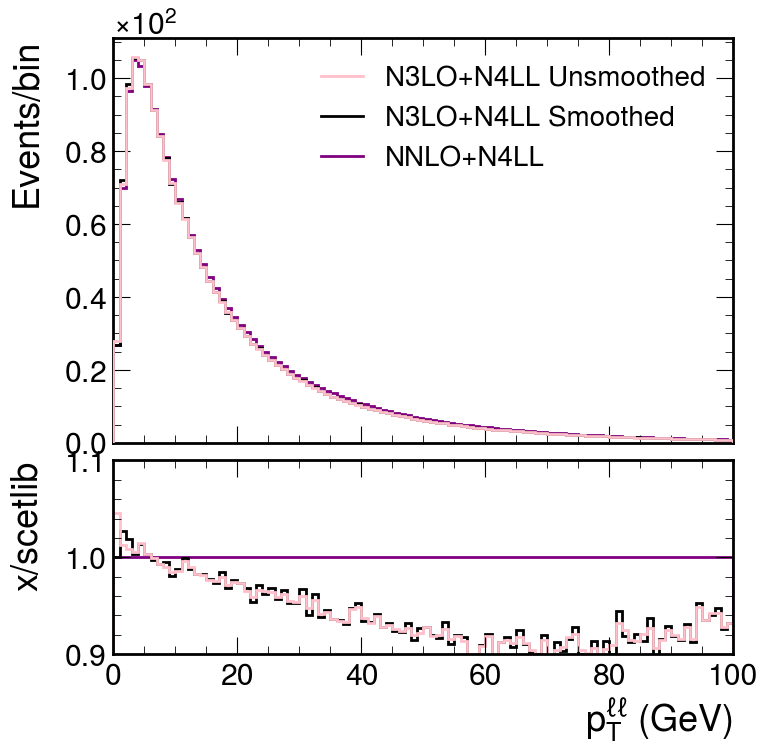

In [128]:
fig = plot_tools.makePlotWithRatioToRef(
                    hists=[
                            scetlib_dyturbo[{"vars" : 0}].project("qT"),
                            scetlib_nnlojet[{"vars" : 0}].project("qT"),
                            hsmooth[{"vars" : 0}].project("qT"),
                            
                    ],
                    labels=[
                            "NNLO+N4LL",
                            "N3LO+N4LL Smoothed",
                            "N3LO+N4LL Unsmoothed",
                           ],
                    colors=[
                            "purple",
                            "black",
                            "pink",
                           ],
                    xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
                    ylabel="Events/bin",
                    rlabel="x/scetlib",
                    rrange=[0.9, 1.1],
                    nlegcols=1,
                    xlim=None, binwnorm=1.0, baseline=True, 
                    ratio_legend=False,
)

In [21]:
corrf = pickle.load(lz4.frame.open("../wremnants-data/data/TheoryCorrections/scetlib_nnlojetN4LLN3LO_pdfasCorrZ.pkl.lz4"))

In [22]:
corrf["Z"].keys()

dict_keys(['scetlib_nnlojetN4LLN3LO_pdfas_minnlo_ratio', 'scetlib_dyturboCT18Z_pdfas_minnlo_ratio', 'scetlib_dyturboCT18Z_pdfas_hist', 'minnlo_ref_hist', 'scetlib_nnlojetN4p0LLN3LO_minnlo_ratio', 'scetlib_nnlojetN4p0LLN3LO_hist'])

/opt/venv/lib/python3.12/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/venv/lib/python3.12/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


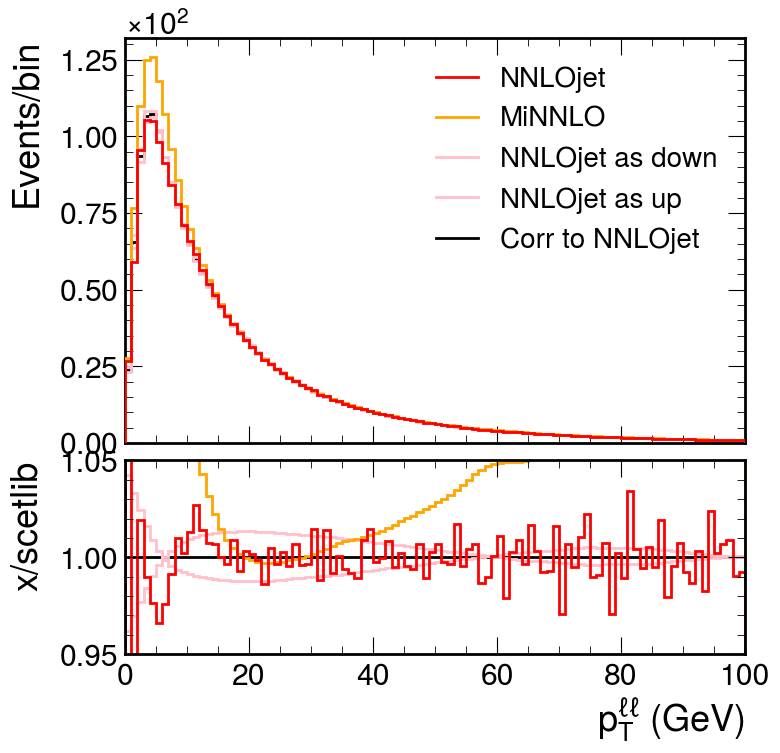

In [23]:
nnlojetas = hh.multiplyHists(corrf["Z"]["minnlo_ref_hist"], corrf["Z"]["scetlib_nnlojetN4LLN3LO_pdfas_minnlo_ratio"], flow=False)
nnlojeth = hh.multiplyHists(corrf["Z"]["minnlo_ref_hist"], corrf["Z"]["scetlib_nnlojetN4p0LLN3LO_minnlo_ratio"], flow=False)
fig = plot_tools.makePlotWithRatioToRef(
                    hists=[
                        nnlojeth[{"vars" : 0}].project("qT"),
                        nnlojetas[{"vars" : 1}].project("qT"),
                        nnlojetas[{"vars" : 2}].project("qT"),
                        corrf["Z"]["minnlo_ref_hist"].project("qT"),
                        corrf["Z"]["scetlib_nnlojetN4p0LLN3LO_hist"][{"vars" : 0}].project("qT"),
                    ],
                    labels=[
                            "Corr to NNLOjet",
                            "NNLOjet as up",
                            "NNLOjet as down",
                            "MiNNLO",
                            "NNLOjet",
                           ],
                    colors=[
                            "black",
                            "pink",
                            "pink",
                            "orange",
                            "red",
                           ],
                    xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
                    ylabel="Events/bin",
                    rlabel="x/scetlib",
                    rrange=[0.95, 1.05],
                    nlegcols=1,
                    xlim=None, binwnorm=1.0, baseline=True, 
                    ratio_legend=False,
            )

/opt/venv/lib/python3.12/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/venv/lib/python3.12/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


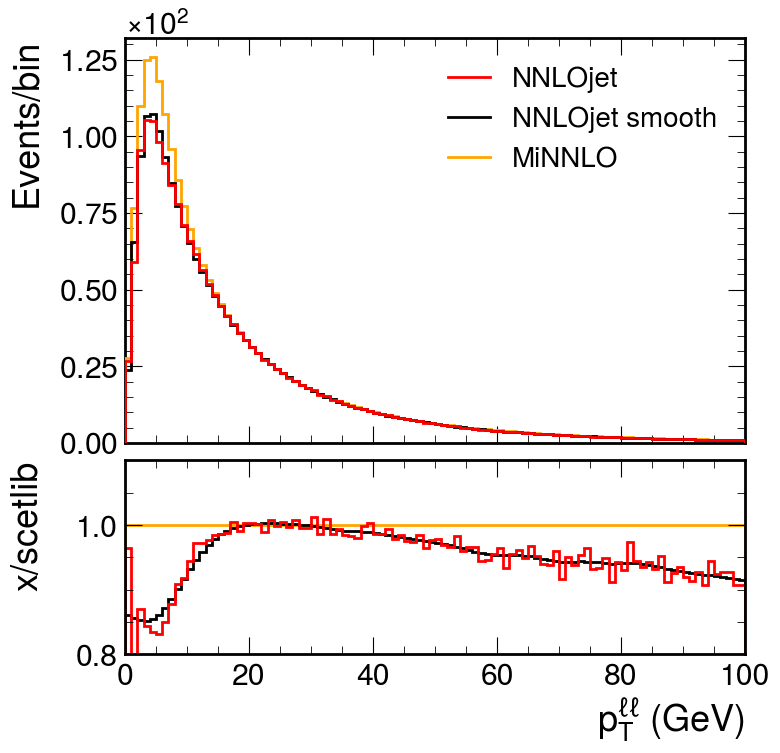

In [24]:
nnlojetas = hh.multiplyHists(corrf["Z"]["minnlo_ref_hist"], corrf["Z"]["scetlib_nnlojetN4LLN3LO_pdfas_minnlo_ratio"], flow=False)
nnlojeth = hh.multiplyHists(corrf["Z"]["minnlo_ref_hist"], corrf["Z"]["scetlib_nnlojetN4p0LLN3LO_minnlo_ratio"], flow=False)
fig = plot_tools.makePlotWithRatioToRef(
                    hists=[
                        corrf["Z"]["minnlo_ref_hist"].project("qT"),
                        nnlojeth[{"vars" : 0}].project("qT"),
                        corrf["Z"]["scetlib_nnlojetN4p0LLN3LO_hist"][{"vars" : 0}].project("qT"),
                    ],
                    labels=[
                            "MiNNLO",
                            "NNLOjet smooth",
                            "NNLOjet",
                           ],
                    colors=[
                            "orange",
                            "black",
                            "red",
                           ],
                    xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
                    ylabel="Events/bin",
                    rlabel="x/scetlib",
                    rrange=[0.8, 1.1],
                    nlegcols=1,
                    xlim=None, binwnorm=1.0, baseline=True, 
                    ratio_legend=False,
            )